In [5]:
import numpy as np
import matplotlib.pyplot as plt

### Задание 1

Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks): zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110], ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]. Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). Произвести расчет как с использованием intercept, так и без.

Способ 1. С использованием intercept.

b = 2.620538882402765
a = 444.1773573243596
y_hat = [535.89621821 562.10160703 942.07974498 968.2851338  548.99891262
 627.61507909 585.68645697 837.25818968 758.64202321 732.43663439]


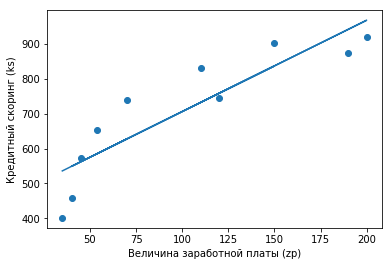

Способ 2. Без использования intercept (матричный метод.

B = [[444.17735732]
 [  2.62053888]]


In [14]:
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

n = 10

# С использованием intercept

print("Способ 1. С использованием intercept.\n")
b = (np.mean(zp * ks) - np.mean(zp) * np.mean(ks)) / (np.mean(zp**2) - np.mean(zp) ** 2)
print(f"b = {b}")

a = np.mean(ks) - b * np.mean(zp)
print(f"a = {a}")

y_hat = a + b * zp
print(f"y_hat = {y_hat}")

%matplotlib inline
plt.scatter(zp, ks)
plt.plot(zp, a + b * zp)
plt.xlabel('Величина заработной платы (zp)')
plt.ylabel('Кредитный скоринг (ks)')
plt.show()

# Без использования intercept (матричный метод)
print("Способ 2. Без использования intercept (матричный метод.\n")

zp1 = zp.reshape((n,1))
ks1 = ks.reshape((n,1))

zp1 = np.hstack([np.ones((n,1)), zp1])
B = np.dot(np.linalg.inv(np.dot(zp1.T,zp1)), zp1.T @ ks1)
print(f"B = {B}")

### Задание 2

Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept)

In [17]:
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])
n = 10
alpha = 1e-6
B1 = 0.1

for i in range(10000):
    B1 = -alpha*(2/n)*np.sum((B1*zp-ks)*zp)
    if i % 1000 == 0:
        print(f"Iteration {i}: B1 = {B1}")
print(f"\nB1 = {B1}")

Iteration 0: B1 = 0.15952808
Iteration 1000: B1 = 0.15793187155662597
Iteration 2000: B1 = 0.15793187155662597
Iteration 3000: B1 = 0.15793187155662597
Iteration 4000: B1 = 0.15793187155662597
Iteration 5000: B1 = 0.15793187155662597
Iteration 6000: B1 = 0.15793187155662597
Iteration 7000: B1 = 0.15793187155662597
Iteration 8000: B1 = 0.15793187155662597
Iteration 9000: B1 = 0.15793187155662597

B1 = 0.15793187155662597


### Задание 3

В каких случаях для вычисления доверительных интервалов и проверки статистических гипотез используется таблица значений функции Лапласа, а в каких - таблица критических точек распределения Стьюдента? *4. Произвести вычисления как в пункте 2, но с вычислением intercept. Учесть, что изменение коэффициентов должно производиться на каждом шаге одновременно (то есть изменение одного коэффициента не должно влиять на изменение другого во время одной итерации)